# Ejercicio 6: Dense Retrieval e Introducción a FAISS

## Objetivo de la práctica

Generar embeddings con sentence-transformers (SBERT, E5), e indexar documentos con FAISS

## Nombre: Michael Perugachi
## Grupo: GR1CC


## Parte 0: Carga del Corpus
### Actividad

1. Carga el corpus 20 Newsgroups desde sklearn.datasets.fetch_20newsgroups.
2. Limita el corpus a los primeros 2000 documentos para facilitar el procesamiento.

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

In [2]:
# Limitamos el corpus a 2000 documentos
newsgroupsdocs = newsgroups.data[:2000]

In [3]:
# Mostramos del corpus
print("Número total de documentos en el corpus:", len(newsgroupsdocs))
print("\nEjemplo de documento:")
print(newsgroupsdocs[0][:800]) # primeros 800 caracteres del primer documento

Número total de documentos en el corpus: 2000

Ejemplo de documento:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




## Parte 2: Generación de Embeddings
### Actividad

1. Usa dos modelos de sentence-transformers. Puedes usar: `'all-MiniLM-L6-v2'` (SBERT), o `'intfloat/e5-base'` (E5). Cuando uses E5, antepon `"passage: "` a cada documento antes de codificar.
2. Genera los vectores de embeddings para todos los documentos usando el modelo seleccionado.
3. Guarda los embeddings en un array de NumPy para su posterior indexación.

In [5]:
# Instalar sentence-transformers
!pip install sentence-transformers

In [6]:
from sentence_transformers import SentenceTransformer
import numpy as np

# 1. Cargar modelo SBERT
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Generar los embeddings
embeddings = model.encode(newsgroupsdocs, show_progress_bar=True)

# 3. Convertir a array de NumPy
embeddings = np.array(embeddings)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [7]:
# Guardamos los embeddings en un array
np.save("embeddings_2000docs.npy", embeddings)

### Captura de creacion de archivo npy
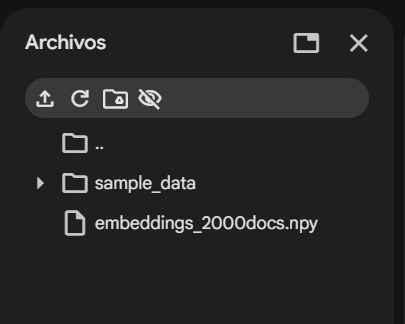

In [8]:
print(embeddings.shape)

(2000, 384)


## Parte 3: Consulta
### Actividad

1. Escribe una consulta en lenguaje natural. Ejemplos:

    * "God, religion, and spirituality"
    * "space exploration"
    * "car maintenance"

2. Codifica la consulta utilizando el mismo modelo de embeddings. Cuando uses E5, antepon `"query: "` a la consulta.
3. Recupera los 5 documentos más relevantes con similitud coseno.
4. Muestra los textos de los documentos recuperados (puedes mostrar solo los primeros 500 caracteres de cada uno).

In [9]:
# Realizar consulta
query = "space exploration"
# Codificamos la condulta en el mismo modelo
query_embedding = model.encode(query)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calcular similitud coseno entre la consulta y todos los documentos
similarities = cosine_similarity(
    [query_embedding],
    embeddings
)[0]  # obtenemos el vector 1D

In [13]:
# Recuperamos los 5 documentos
top_k = 5
indices = np.argsort(similarities)[::-1][:top_k]

In [14]:
# Mostramos los documentos recuperados
for rank, idx in enumerate(indices, start=1):
    print(f"\n=== Documento #{rank} (ID: {idx}) - Similitud: {similarities[idx]:.4f} ===")
    print(newsgroupsdocs[idx][:500], "...")  # mostrar solo 500 caracteres



=== Documento #1 (ID: 495) - Similitud: 0.4991 ===
I am posting this for a friend without internet access. Please inquire
to the phone number and address listed.
---------------------------------------------------------------------

"Space: Teaching's Newest Frontier"
Sponsored by the Planetary Studies Foundation

The Planetary Studies Foundation is sponsoring a one week class for
teachers called "Space: Teaching's Newest Frontier." The class will be
held at the Sheraton Suites in Elk Grove, Illinois from June 14 through
June 18. Participants wh ...

=== Documento #2 (ID: 1643) - Similitud: 0.4398 ===

Well, here goes.

The first item of business is to establish the importance space life
sciences in the whole of scheme of humankind.  I mean compared
to football and baseball, the average joe schmoe doesn't seem interested
or even curious about spaceflight.  I think that this forum can
make a major change in that lack of insight and education.

All of us, in our own way, can contribute 